### 0. define librairies

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder

### 1. read data

In [2]:
filename = 'vispremv.dat'
data = pd.read_csv(filename,sep='\s+')
data.head()

SEXEQ FAMIQ PCSPQ kvunbq vienbq uemnbq xlgnbq ylvnbq rocnbq nptagq  \
148009  Shom  Fcou  Pint     K1     V1     U2     X2     Y2     R1     N0   
552427  Shom  Fcou  Pint     K0     V0     U1     X0     Y1     R0     N0   
556005  Shom  Fseu  Psan     K0     V0     U2     X1     Y2     R1     N0   
556686  Shom  Fseu  Pouv     K0     V1     U2     X2     Y2     R1     N1   
642680  Shom  Fcou  Pint     K0     V0     U2     X1     Y2     R1     N0   

        ... XLGNB     XLGMTL YLVNB     YLVMTL ROCNB NPTAG     ITAVCL  \
148009  ...     2  13.161865     2  12.110635    14     0  14.080718   
552427  ...     0   0.000000     1   8.132413     0     0  11.717872   
556005  ...     1  10.743178     2  10.309286    14     0  11.329303   
556686  ...     3  12.899220     2  11.203025    11     1  13.111856   
642680  ...     1  10.457976     2   9.190546    27     0  11.304904   

           HAVEFL    JNBJDL CARVP  
148009  13.230263  0.693147  Coui  
552427   0.000000  0.000000  Coui  
556005   0.000000  0.000000  Coui  
556686   9.972267  2.772589  Coui  
642680   0.000000  1.386294  Coui  

[5 rows x 54 columns]

### 2. analyze data

In [3]:
n,p=data.shape
print("lines :", n, "columns:", p)

lines : 1063 columns: 54


In [4]:
data.dtypes

SEXEQ      object
FAMIQ      object
PCSPQ      object
kvunbq     object
vienbq     object
uemnbq     object
xlgnbq     object
ylvnbq     object
rocnbq     object
nptagq     object
endetq     object
gagetq     object
facanq     object
lgagtq     object
havefq     object
jnbjdq     object
ageq       object
relatq     object
qsmoyq     object
opgnbq     object
moyrvq     object
tavepq     object
dmvtpq     object
boppnq     object
itavcq     object
RELAT       int64
AGER        int64
OPGNBL    float64
MOYRVL    float64
TAVEPL    float64
ENDETL    float64
GAGETL    float64
GAGECL    float64
GAGEML    float64
KVUNB       int64
QSMOY       int64
QCREDL    float64
DMVTPL    float64
BOPPNL    float64
FACANL    float64
LGAGTL    float64
VIENB       int64
VIEMTL    float64
UEMNB       int64
XLGNB       int64
XLGMTL    float64
YLVNB       int64
YLVMTL    float64
ROCNB       int64
NPTAG       int64
ITAVCL    float64
HAVEFL    float64
JNBJDL    float64
CARVP      object
dtype: object

* Variables numériques terminant par L
* Variables qualitatives terminant par Q
* Variables catégorielles autres

In [5]:
data.describe()

RELAT         AGER       OPGNBL       MOYRVL       TAVEPL  \
count  1063.000000  1063.000000  1063.000000  1063.000000  1063.000000   
mean    132.574788    42.573848     0.627211     2.371296     6.715418   
std      93.499830    11.912343     0.685315     1.464376     4.907295   
min      -2.000000    18.000000     0.000000     0.000000     0.000000   
25%      42.500000    33.000000     0.000000     1.386294     0.000000   
50%     130.000000    43.000000     0.693147     2.564949     8.652248   
75%     204.500000    52.000000     1.098612     3.349750    10.962298   
max     393.000000    65.000000     3.367296     7.451242    13.785052   

            ENDETL       GAGETL       GAGECL       GAGEML        KVUNB  ...  \
count  1063.000000  1063.000000  1063.000000  1063.000000  1063.000000  ...   
mean      0.827903     4.477338     1.868891     2.394713     1.028222  ...   
std       1.279475     5.473534     3.680483     4.540024     0.501554  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     1.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     1.000000  ...   
75%       1.945910    10.483833     0.000000     0.000000     1.000000  ...   
max       4.605170    15.060512    13.123924    14.296852     4.000000  ...   

             UEMNB        XLGNB       XLGMTL        YLVNB       YLVMTL  \
count  1063.000000  1063.000000  1063.000000  1063.000000  1063.000000   
mean      1.468485     0.649106     4.161701     0.760113     4.726685   
std       1.280262     0.794352     5.205502     0.782235     4.662683   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     1.000000     4.882802   
75%       2.000000     1.000000    10.033572     1.000000     9.651494   
max       9.000000     4.000000    13.270100     4.000000    13.785052   

             ROCNB        NPTAG       ITAVCL       HAVEFL       JNBJDL  
count  1063.000000  1063.000000  1063.000000  1063.000000  1063.000000  
mean      8.564440     0.136406     9.373976     3.043170     1.189791  
std      11.738092     0.379837     3.313518     4.665580     1.587594  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     8.067305     0.000000     0.000000  
50%       2.000000     0.000000    10.075969     0.000000     0.000000  
75%      14.000000     0.000000    11.649131     6.216606     2.441401  
max      69.000000     4.000000    16.045468    15.770893     4.905275  

[8 rows x 28 columns]

* Ancienneté moyenne de la relation client 132.5 mois, anc. min=-2?
* Age moyen=42.57 ans,  Age min=18 ans, Age max=65 ans

In [6]:
# nombre de clients ayant une ancienneté de la relation client négative
data.loc[data.RELAT<0, 'RELAT']

1054710   -2
Name: RELAT, dtype: int64

Un individu a une anciennté de la relation client négative

In [7]:
class_counts = data.groupby('CARVP').size()
print(class_counts)

CARVP
Cnon    706
Coui    357
dtype: int64


In [8]:
data.CARVP.replace(['Coui','Cnon'], [1,0], inplace=True)
data['CARVP'].mean() # 33,58% des individus détiennent la carte visa premier

0.33584195672624645

In [9]:
# recuperation des variables
VarL=data.select_dtypes(include=['int64', 'float64']).columns.tolist()
VarL.remove('CARVP')
print(VarL)

['RELAT', 'AGER', 'OPGNBL', 'MOYRVL', 'TAVEPL', 'ENDETL', 'GAGETL', 'GAGECL', 'GAGEML', 'KVUNB', 'QSMOY', 'QCREDL', 'DMVTPL', 'BOPPNL', 'FACANL', 'LGAGTL', 'VIENB', 'VIEMTL', 'UEMNB', 'XLGNB', 'XLGMTL', 'YLVNB', 'YLVMTL', 'ROCNB', 'NPTAG', 'ITAVCL', 'HAVEFL', 'JNBJDL']


In [10]:
VarQ=data.select_dtypes(include=['object']).columns.tolist()
print(VarQ)

['SEXEQ', 'FAMIQ', 'PCSPQ', 'kvunbq', 'vienbq', 'uemnbq', 'xlgnbq', 'ylvnbq', 'rocnbq', 'nptagq', 'endetq', 'gagetq', 'facanq', 'lgagtq', 'havefq', 'jnbjdq', 'ageq', 'relatq', 'qsmoyq', 'opgnbq', 'moyrvq', 'tavepq', 'dmvtpq', 'boppnq', 'itavcq']


### Visiualization

### 1. Histogram

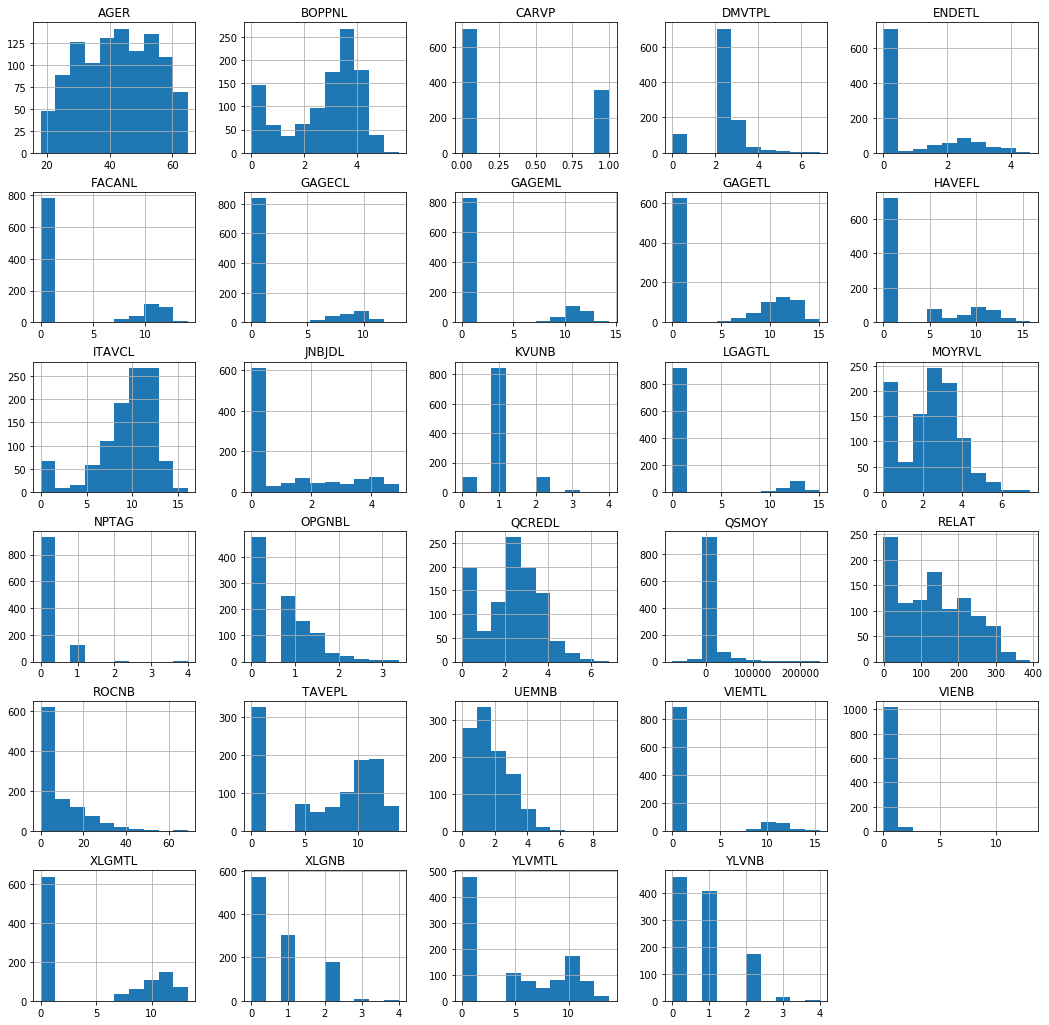

In [11]:
data.hist(figsize=(18,18))
plt.show()

### 2. density

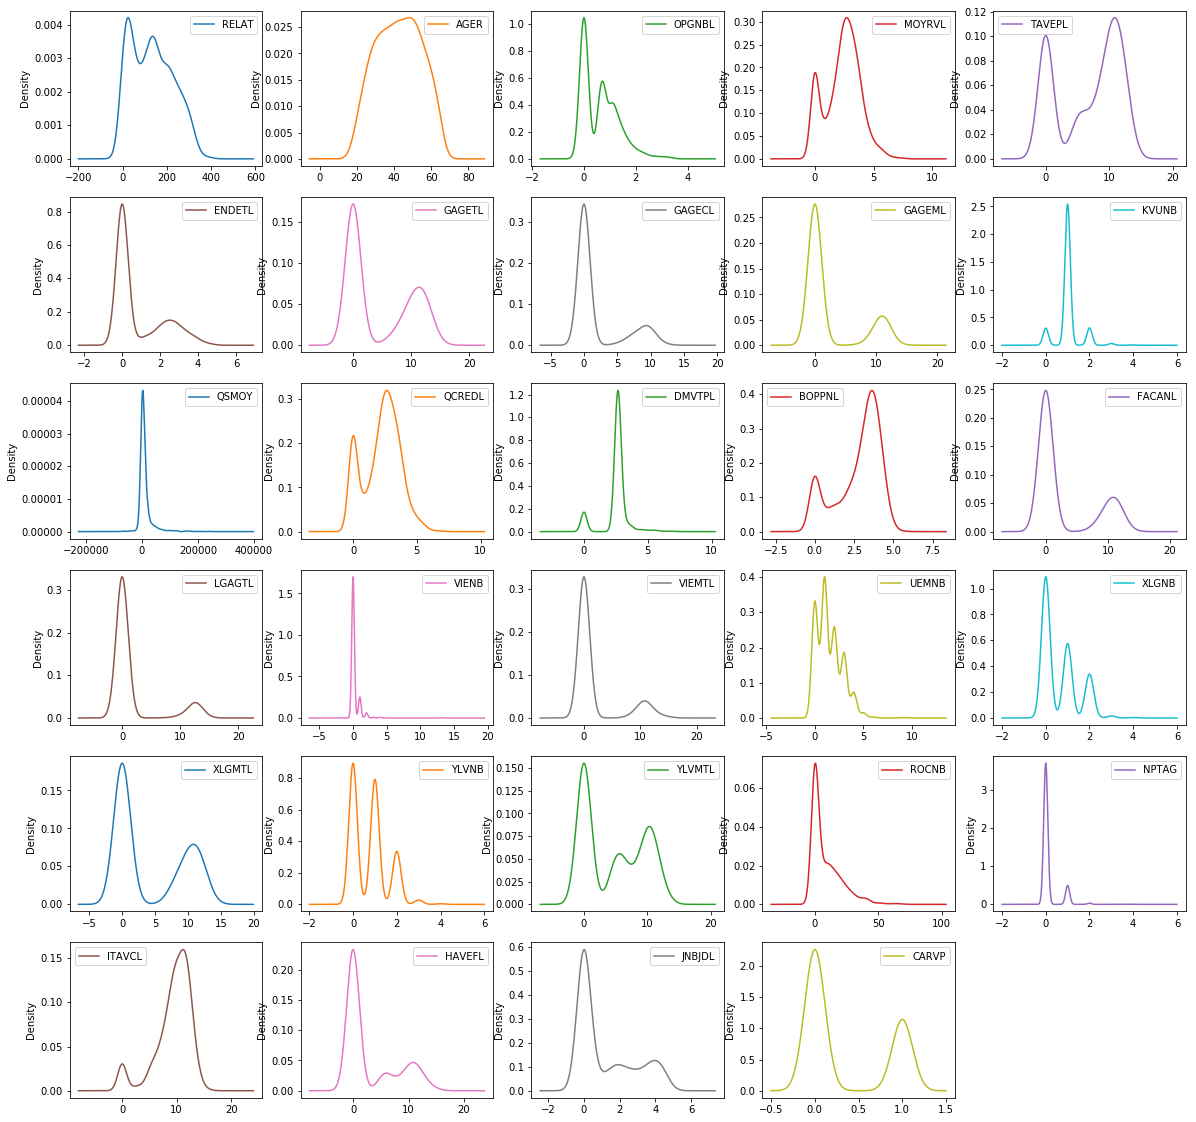

In [12]:
data.plot(kind='density', subplots=True, layout=(6,5), sharex=False, figsize=(20,20))
plt.show()

### 3. Boxplot

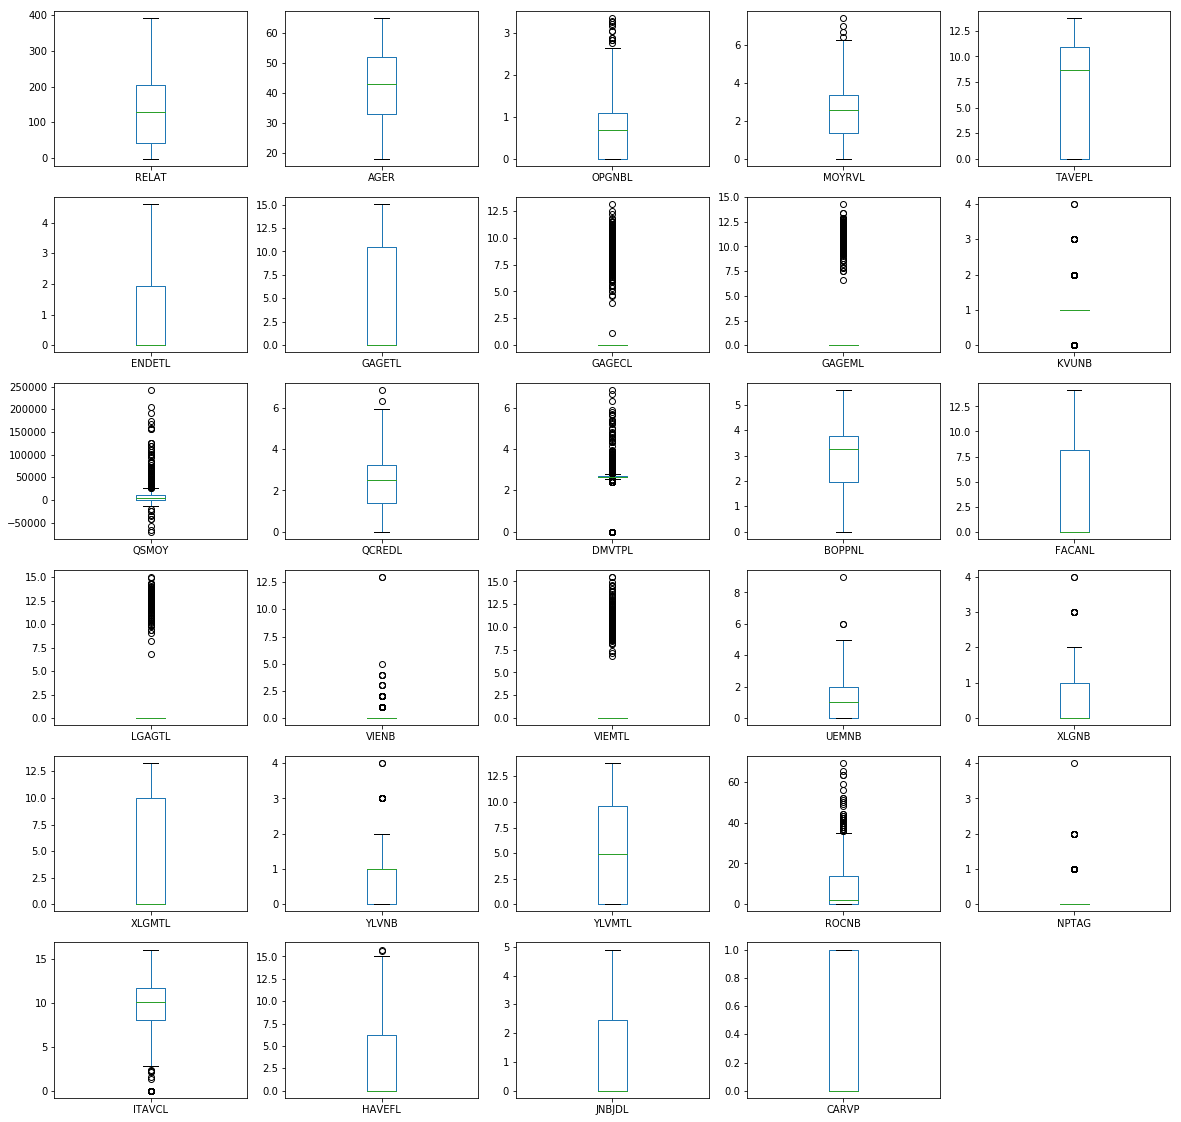

In [13]:
data.plot(kind='box', subplots=True, layout=(6,5), sharex=False, sharey=False, figsize=(20,20))
plt.show()

* Trop de valeurs aberrantes pour les variables : OPGNBL, MOYRVL, GAGECL,
GAGEML, QSMOY, DMVTPL, LGAGTL,VIENB, VIEMTL, ROCNB, ITAVCL

SEXEQ      Sfem      Shom
CARVP                    
0      0.490085  0.509915
1      0.156863  0.843137


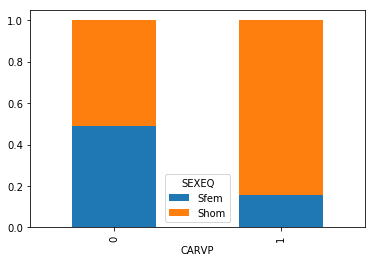

FAMIQ      Fcou      Fseu
CARVP                    
0      0.508499  0.491501
1      0.627451  0.372549


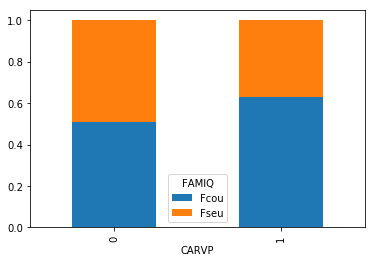

PCSPQ      Pcad      Pemp      Pint      Pouv      Psan
CARVP                                                  
0      0.002833  0.133144  0.171388  0.318697  0.373938
1      0.081232  0.204482  0.436975  0.173669  0.103641


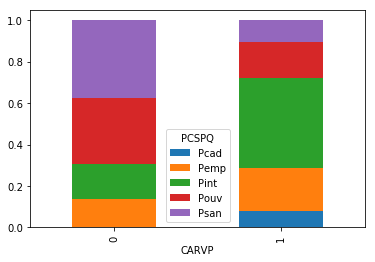

kvunbq        K0        K1
CARVP                     
0       0.949008  0.050992
1       0.773109  0.226891


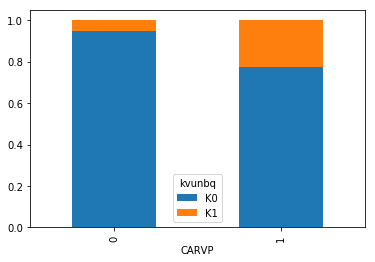

vienbq        V0        V1
CARVP                     
0       0.864023  0.135977
1       0.778711  0.221289


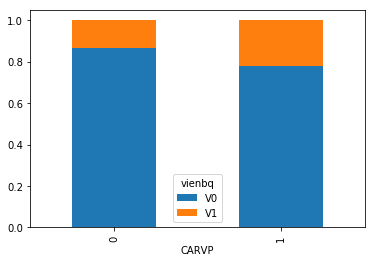

uemnbq        U0        U1        U2
CARVP                               
0       0.279037  0.356941  0.364023
1       0.229692  0.235294  0.535014


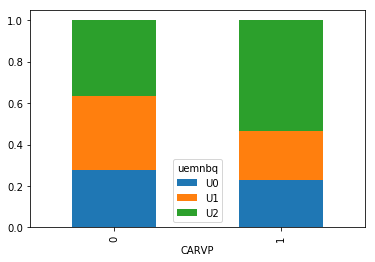

xlgnbq        X0        X1        X2
CARVP                               
0       0.583569  0.270538  0.145892
1       0.450980  0.310924  0.238095


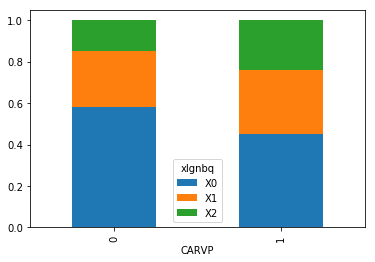

ylvnbq        Y0        Y1        Y2
CARVP                               
0       0.458924  0.396601  0.144476
1       0.389356  0.364146  0.246499


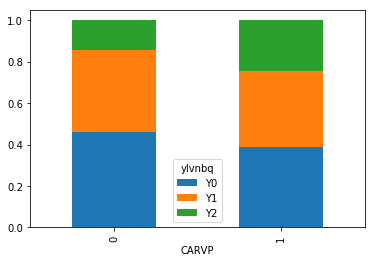

rocnbq        R0        R1
CARVP                     
0       0.531161  0.468839
1       0.305322  0.694678


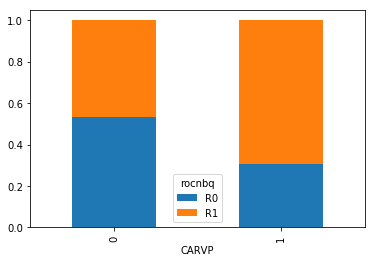

nptagq        N0        N1
CARVP                     
0       0.844193  0.155807
1       0.932773  0.067227


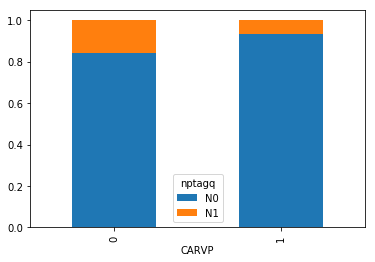

endetq        E0        E1
CARVP                     
0       0.730878  0.269122
1       0.554622  0.445378


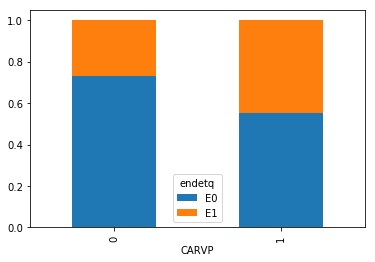

gagetq        G0        G1
CARVP                     
0       0.672805  0.327195
1       0.411765  0.588235


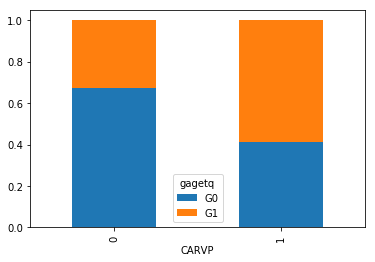

facanq        F0        F1
CARVP                     
0       0.779037  0.220963
1       0.647059  0.352941


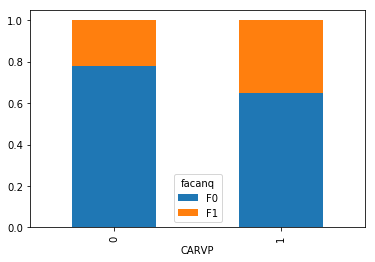

lgagtq        L0        L1
CARVP                     
0       0.903683  0.096317
1       0.795518  0.204482


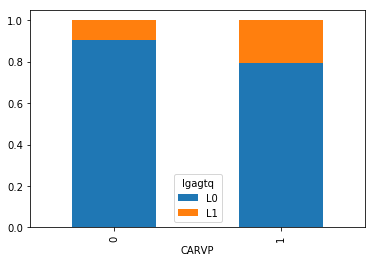

havefq        H0        H1
CARVP                     
0       0.732295  0.267705
1       0.568627  0.431373


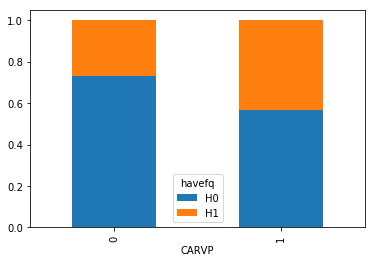

jnbjdq        J0        J1        J2
CARVP                               
0       0.643059  0.181303  0.175637
1       0.445378  0.268908  0.285714


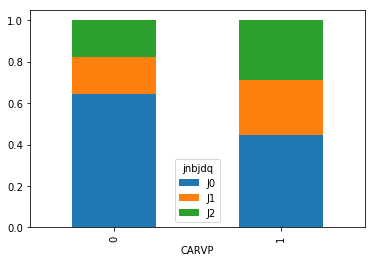

ageq         A0        A1        A2
CARVP                              
0      0.386686  0.297450  0.315864
1      0.252101  0.414566  0.333333


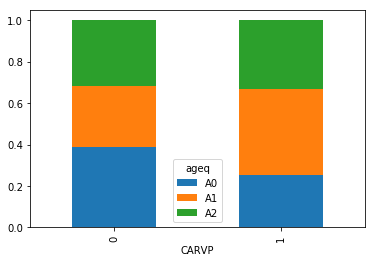

relatq        R0        R1       R2
CARVP                              
0       0.317280  0.345609  0.33711
1       0.372549  0.302521  0.32493


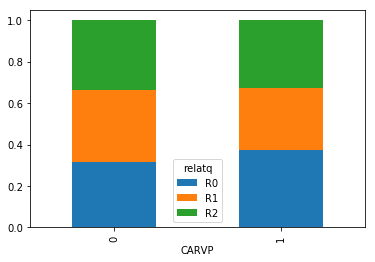

qsmoyq        Q0        Q1        Q2
CARVP                               
0       0.379603  0.392351  0.228045
1       0.243697  0.215686  0.540616


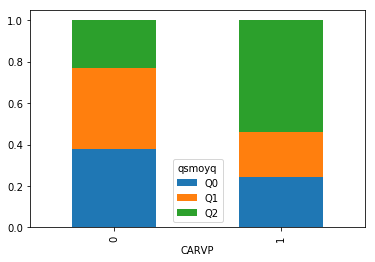

opgnbq        O0        O1        O2
CARVP                               
0       0.526912  0.225212  0.247875
1       0.285714  0.257703  0.456583


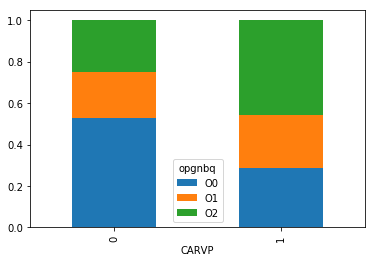

moyrvq        M0        M1        M2
CARVP                               
0       0.437677  0.406516  0.155807
1       0.148459  0.176471  0.675070


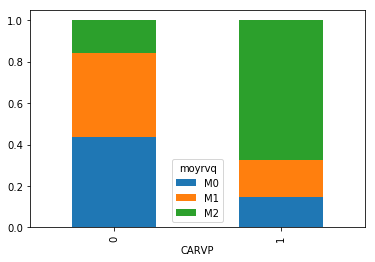

tavepq        T0        T1        T2
CARVP                               
0       0.356941  0.365439  0.277620
1       0.291317  0.266106  0.442577


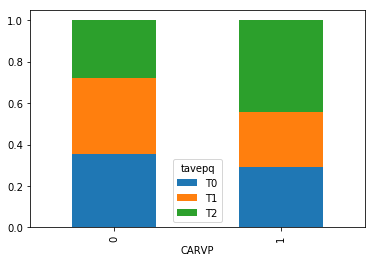

dmvtpq        D0        D1        D2
CARVP                               
0       0.647309  0.154391  0.198300
1       0.495798  0.196078  0.308123


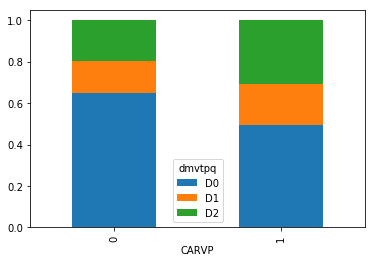

boppnq        B0       B1        B2
CARVP                              
0       0.381020  0.36119  0.257790
1       0.246499  0.27451  0.478992


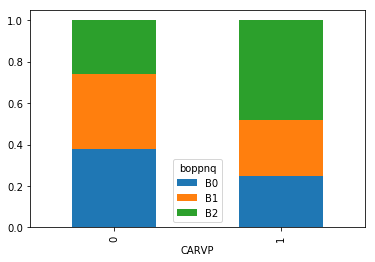

itavcq        I0       I1        I2
CARVP                              
0       0.409348  0.33711  0.253541
1       0.184874  0.32493  0.490196


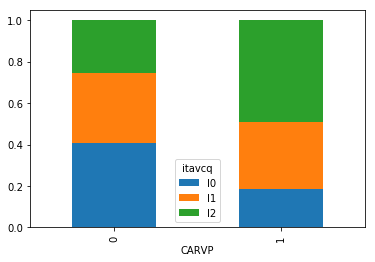

In [14]:
for column in VarQ:
    tableau=pd.crosstab(data.CARVP, data[column], normalize='index')
    print(tableau)
    tableau.plot(kind="bar", stacked=True)
    plt.show()
    print("=================================================================")

### Features selection

In [16]:
VarQ_selected=['PCSPQ', 'FAMIQ', 'SEXEQ']

VarL=data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(VarL)

VarQ=data.select_dtypes(include=['object']).columns.tolist()
print(VarQ)

y=data.CARVP
X=data.drop(VarQ, axis=1)

['RELAT', 'AGER', 'OPGNBL', 'MOYRVL', 'TAVEPL', 'ENDETL', 'GAGETL', 'GAGECL', 'GAGEML', 'KVUNB', 'QSMOY', 'QCREDL', 'DMVTPL', 'BOPPNL', 'FACANL', 'LGAGTL', 'VIENB', 'VIEMTL', 'UEMNB', 'XLGNB', 'XLGMTL', 'YLVNB', 'YLVMTL', 'ROCNB', 'NPTAG', 'ITAVCL', 'HAVEFL', 'JNBJDL', 'CARVP']
['SEXEQ', 'FAMIQ', 'PCSPQ', 'kvunbq', 'vienbq', 'uemnbq', 'xlgnbq', 'ylvnbq', 'rocnbq', 'nptagq', 'endetq', 'gagetq', 'facanq', 'lgagtq', 'havefq', 'jnbjdq', 'ageq', 'relatq', 'qsmoyq', 'opgnbq', 'moyrvq', 'tavepq', 'dmvtpq', 'boppnq', 'itavcq']


In [17]:
X=X.drop("CARVP", axis=1)

* Xgboost Feature Importance Scores

* RandomForestClassifier Feature Importance Scores

In [18]:
### comparaison sélection

In [19]:
# define the model
model1 = GradientBoostingClassifier()
model2 = RandomForestClassifier()
# fit the model
model1.fit(X, y)
model2.fit(X,y)
names=X.columns.tolist()
# get importance
Xgboost_Selected = model1.feature_importances_
RF_Selected = model2.feature_importances_

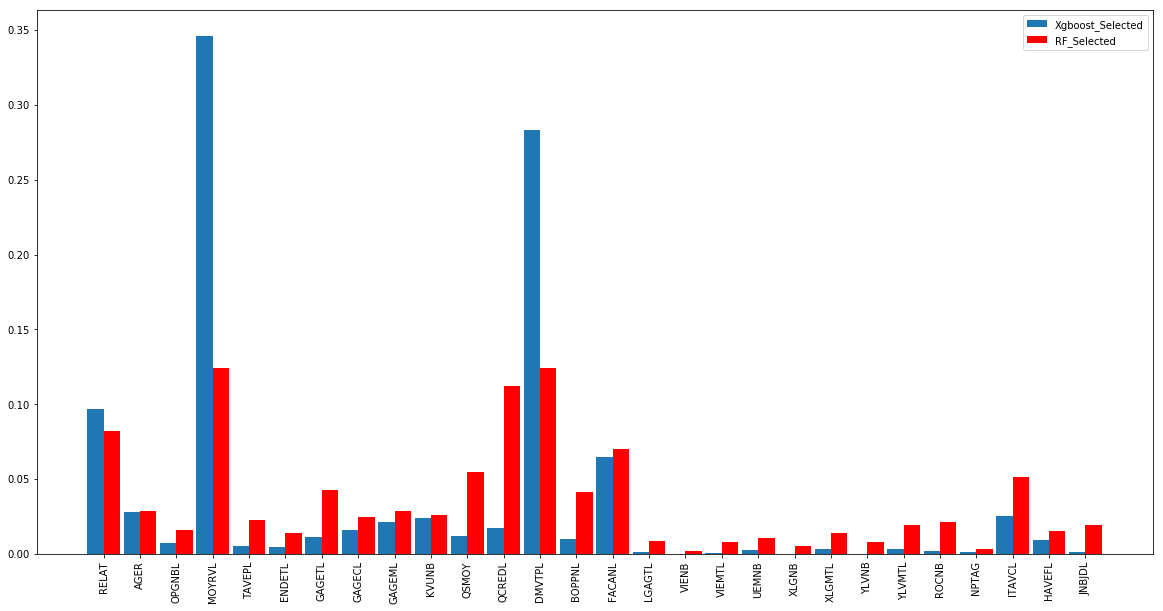

In [21]:
# plot feature importance
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ticks = np.arange(X.shape[1])
width = 0.45
plt.bar(ticks, Xgboost_Selected, width=width, label='Xgboost_Selected')
plt.bar(ticks+width, RF_Selected, color = 'r', width=width, label='RF_Selected')
plt.xticks(ticks+width/2, names, rotation=90)
plt.legend(loc='best')
plt.show()

### 3. Check Algorithms

* Prepare data

In [26]:
VarQ_selected=['PCSPQ', 'FAMIQ', 'SEXEQ']

VarL=data.select_dtypes(include=['int64', 'float64']).columns.tolist()
VarL.remove("CARVP")
print(VarL)

VarQ=data.select_dtypes(include=['object']).columns.tolist()
VarQ.remove('PCSPQ')
VarQ.remove('FAMIQ')
VarQ.remove('SEXEQ')
print(VarQ)

['RELAT', 'AGER', 'OPGNBL', 'MOYRVL', 'TAVEPL', 'ENDETL', 'GAGETL', 'GAGECL', 'GAGEML', 'KVUNB', 'QSMOY', 'QCREDL', 'DMVTPL', 'BOPPNL', 'FACANL', 'LGAGTL', 'VIENB', 'VIEMTL', 'UEMNB', 'XLGNB', 'XLGMTL', 'YLVNB', 'YLVMTL', 'ROCNB', 'NPTAG', 'ITAVCL', 'HAVEFL', 'JNBJDL']
['kvunbq', 'vienbq', 'uemnbq', 'xlgnbq', 'ylvnbq', 'rocnbq', 'nptagq', 'endetq', 'gagetq', 'facanq', 'lgagtq', 'havefq', 'jnbjdq', 'ageq', 'relatq', 'qsmoyq', 'opgnbq', 'moyrvq', 'tavepq', 'dmvtpq', 'boppnq', 'itavcq']


In [27]:
y=data.CARVP
X=data[VarL + VarQ_selected]
X.loc[X.RELAT>0]

RELAT  AGER    OPGNBL    MOYRVL     TAVEPL    ENDETL     GAGETL  \
148009     238    51  0.000000  4.753590  13.461603  1.609438  11.688701   
552427     139    58  0.000000  3.713572   8.132413  0.000000   0.000000   
556005      99    27  0.000000  2.890372  11.242717  0.000000   0.000000   
556686      89    49  0.000000  5.926926  13.067592  0.000000  12.250391   
642680     216    64  1.791759  3.218876  11.270382  0.000000   0.000000   
...        ...   ...       ...       ...        ...       ...        ...   
7567726     23    38  0.000000  0.000000   0.000000  0.000000   0.000000   
7572458     27    43  0.000000  0.000000   9.276690  0.000000   0.000000   
7574479     31    49  1.609438  2.708050  10.930353  0.000000   0.000000   
7580358    192    27  1.098612  2.197225  10.112248  0.000000   0.000000   
7589439    137    34  0.000000  0.693147   9.080915  0.000000   0.000000   

           GAGECL     GAGEML  KVUNB  ...  YLVNB     YLVMTL  ROCNB  NPTAG  \
148009    0.00000  11.688701      2  ...      2  12.110635     14      0   
552427    0.00000   0.000000      1  ...      1   8.132413      0      0   
556005    0.00000   0.000000      1  ...      2  10.309286     14      0   
556686   10.54165  12.050611      1  ...      2  11.203025     11      1   
642680    0.00000   0.000000      1  ...      2   9.190546     27      0   
...           ...        ...    ...  ...    ...        ...    ...    ...   
7567726   0.00000   0.000000      0  ...      0   0.000000      0      0   
7572458   0.00000   0.000000      0  ...      0   0.000000      0      0   
7574479   0.00000   0.000000      1  ...      0   0.000000      9      0   
7580358   0.00000   0.000000      1  ...      0   0.000000      2      0   
7589439   0.00000   0.000000      0  ...      0   0.000000      0      0   

            ITAVCL     HAVEFL    JNBJDL  PCSPQ  FAMIQ  SEXEQ  
148009   14.080718  13.230263  0.693147   Pint   Fcou   Shom  
552427   11.717872   0.000000  0.000000   Pint   Fcou   Shom  
556005   11.329303   0.000000  0.000000   Psan   Fseu   Shom  
556686   13.111856   9.972267  2.772589   Pouv   Fseu   Shom  
642680   11.304904   0.000000  1.386294   Pint   Fcou   Shom  
...            ...        ...       ...    ...    ...    ...  
7567726   0.000000   0.000000  0.000000   Psan   Fcou   Sfem  
7572458   9.276690   0.000000  0.000000   Pint   Fcou   Sfem  
7574479  11.056225   0.000000  2.302585   Pouv   Fcou   Sfem  
7580358  10.236310   0.000000  3.663562   Psan   Fseu   Sfem  
7589439   9.080915   0.000000  0.000000   Pint   Fcou   Sfem  

[1062 rows x 31 columns]

* Split with stratification

In [28]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True, stratify=y)

### Check Algorithms

In [29]:
# define the data preparation for the columns
t = [('VarQ', OneHotEncoder(), VarQ_selected), ('VarL', StandardScaler(), VarL)]
col_transform = ColumnTransformer(transformers=t)

# define the models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DTree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('RForest', RandomForestClassifier()))
models.append(('XgBoost', GradientBoostingClassifier()))

for name, model in models:
    # define pipeline
    pipeline = Pipeline([('s',col_transform),(name,model)])
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model
    m_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    # summarize the result
    print('%s > Accuracy: %.3f (%.3f)' % (name, np.mean(m_scores), np.std(m_scores)))
    

LR > Accuracy: 0.841 (0.033)
LDA > Accuracy: 0.839 (0.040)
DTree > Accuracy: 0.864 (0.032)
KNN > Accuracy: 0.760 (0.037)
Bagging > Accuracy: 0.889 (0.025)
RForest > Accuracy: 0.895 (0.028)
XgBoost > Accuracy: 0.916 (0.025)


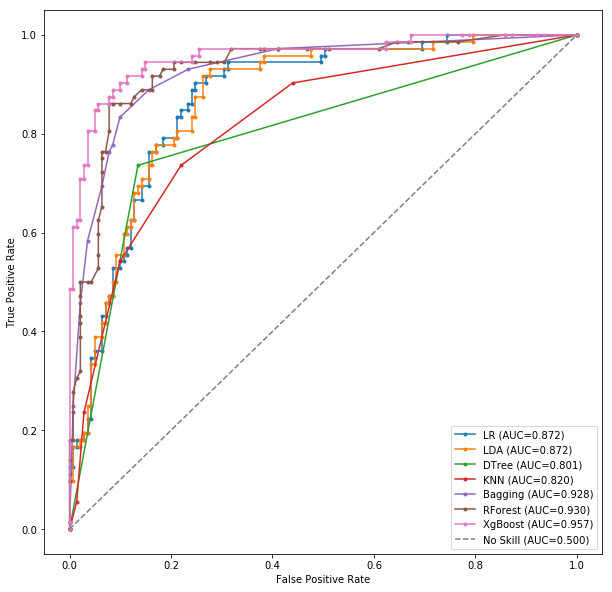

In [31]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# Compare roc curves    
for name, model in models:
    # define pipeline
    pipeline = Pipeline([('s',col_transform),(name,model)])
    # fit pipeline
    pipeline.fit(X_train, Y_train)
    # predict probabilities
    m_probs = pipeline.predict_proba(X_validation)
    # keep probabilities for the positive outcome only
    m_probs = m_probs[:, 1]
    # calculate scores
    ns_probs = [0 for _ in range(len(Y_validation))]
    ns_auc = roc_auc_score(Y_validation, ns_probs)
    m_auc = roc_auc_score(Y_validation, m_probs)

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
    m_fpr, m_tpr, _ = roc_curve(Y_validation, m_probs)
    # plot the roc curve for the model

    plt.plot(m_fpr, m_tpr, marker='.', label='%s (AUC=%.3f)' % (name, m_auc))
    
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill (AUC=%.3f)' % (ns_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

### Xgboost with Hyperparameters tuning

In [ ]:
# define the data preparation for the columns
t = [('VarQ', OneHotEncoder(), VarQ_selected), ('VarL', StandardScaler(), VarL)]
col_transform = ColumnTransformer(transformers=t)

# define the modeling pipeline
model = GradientBoostingClassifier()

# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

pipeline = Pipeline([('s',col_transform),('clf',model)])


# define grid search
grid = dict(clf__learning_rate=learning_rate, clf__n_estimators=n_estimators, clf__subsample=subsample, clf__max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=pipeline, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.924314 using {'clflearning_rate': 0.01, 'clfmax_depth': 3, 'clfn_estimators': 1000, 'clfsubsample': 0.7}

### Make predictions

In [32]:
# define the data preparation for the columns
t = [('VarQ', OneHotEncoder(), VarQ_selected), ('VarL', StandardScaler(), VarL)]
col_transform = ColumnTransformer(transformers=t)

# define the modeling pipeline
model = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7, random_state=10)
pipeline = Pipeline([('s',col_transform),('m',model)])

# Make predictions on validation dataset
pipeline.fit(X_train, Y_train)
predictions =pipeline.predict(X_validation)

### Evaluate predictions

In [33]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8967136150234741
[[134   7]
 [ 15  57]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       141
           1       0.89      0.79      0.84        72

    accuracy                           0.90       213
   macro avg       0.89      0.87      0.88       213
weighted avg       0.90      0.90      0.90       213



* Accuracy =89.67%

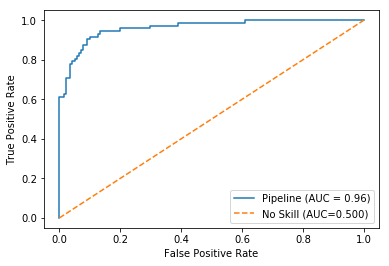

In [34]:
svc_disp = plot_roc_curve(pipeline, X_validation, Y_validation)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_validation))]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
ns_auc = roc_auc_score(Y_validation, ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill (AUC=%.3f)' % (ns_auc))
plt.legend(loc='best')
plt.show()